In [1]:
import glob
import polars
import plotly.express as px
from pathlib import Path
import numpy as np
import pyarrow
import plotly.io as pio
import matplotlib.pyplot as plt

In [2]:
DIR = "C:\\Users\\aurin\\Desktop\\magisterka\\mapping\\v2"

## long reads - sample distribution

In [3]:
names = []
reads_mapped = []
reads_mapped_paired = []
reads_unmapped = []
reads_paired = []
bases_mapped = []
mismatches = []
error_rate = []
average_length = []
number_of_sequences = []

for file in glob.glob(f"{DIR}\\long\\*"):
    name = Path(file).stem
    names.append(name)
    print(name)
    df = polars.read_csv(file, has_header = True, separator = "\t", skip_rows = 7, 
                           truncate_ragged_lines=True, n_rows = 40, 
                           new_columns = ["SN", "Q", "V", "comment"]
                          )
    n_sequences = df.filter(df["Q"] == "sequences:").select("V").item()
    number_of_sequences.append(n_sequences)
    r_mapped = df.filter(df["Q"] == "reads mapped:").select("V").item()
    reads_mapped.append(r_mapped)
    r_mapped_paired = df.filter(df["Q"] == "reads mapped and paired:").select("V").item()
    reads_mapped_paired.append(r_mapped_paired)
    r_unmapped = df.filter(df["Q"] == "reads unmapped:").select("V").item()
    reads_unmapped.append(r_unmapped)
    r_paired = df.filter(df["Q"] == "reads paired:").select("V").item()
    reads_paired.append(r_paired)
    b_mapped = df.filter(df["Q"] == "bases mapped (cigar):").select("V").item()
    bases_mapped.append(b_mapped)
    mm = df.filter(df["Q"] == "mismatches:").select("V").item()
    mismatches.append(mm)
    er = df.filter(df["Q"] == "error rate:").select("V").item()
    error_rate.append(er)
    al = df.filter(df["Q"] == "average length:").select("V").item()
    average_length.append(al)
    

3h1_2_stats_result_l
3h1_3_stats_result_l
3h1_4_stats_result_l
Ihp1_1_stats_result_l
Ihp1_3h1_2_stats_result_l
Ihp1_3h1_3_stats_result_l
Ihp1_3h1_4_stats_result_l
Ihp1_3_stats_result_l
Ihp1_4_stats_result_l
wt_1_stats_result_l
wt_3_stats_result_l
wt_4_stats_result_l


In [10]:
error_rate

[0.0251805,
 0.02615257,
 0.02619985,
 0.02719022,
 0.02720216,
 0.02571245,
 0.0263048,
 0.02665982,
 0.027581,
 0.02285902,
 0.02398404,
 0.02371125]

In [5]:
suma_seq = np.sum(number_of_sequences)

In [6]:
suma_seq

np.float64(728697910.0)

In [7]:
reads_mapped_mean = np.mean(reads_mapped)
reads_mapped_paired_mean = np.mean(reads_mapped_paired)
reads_unmapped_mean = np.mean(reads_unmapped)
reads_paired_mean = np.mean(reads_paired)
bases_mapped_mean = np.mean(bases_mapped)
mismatches_mean = np.mean(mismatches)
error_rate_mean = np.mean(error_rate)

In [8]:
data = polars.DataFrame({"samples": names,
                        "reads_mapped": reads_mapped,
                        "reads_mapped_paired": reads_mapped_paired,
                        "reads_unmapped": reads_unmapped,
                        "reads_paired": reads_paired,
                        "bases_mapped": bases_mapped,
                        "mismatches": mismatches,
                        "error_rate": error_rate,
                        "average_length": average_length
                        })

In [9]:
df = data.to_pandas()

#### plots

In [7]:
# pdf_file = "plots.pdf"
# c = canvas.Canvas(pdf_file, pagesize=letter)

In [10]:
columns_to_plot = ["reads_mapped", "reads_mapped_paired", "reads_unmapped",
                   "reads_paired", "bases_mapped", "mismatches", "error_rate", "average_length"]

for col in columns_to_plot:
    fig = px.bar(df, x="samples", y=col, title=f'{col}', hover_name="samples")
    fig.update_layout(
        width=600,  # Set width of the plot
        height=300,  # Set height of the plot
        margin=dict(l=20, r=20, t=30, b=20),  # Reduce margins
        title=dict(x=0.5, font=dict(size=14)),  # Center title and reduce its font size
        xaxis=dict(tickangle=45, tickfont=dict(size=10)),  # Rotate x-axis labels for readability, reduce font size
        yaxis=dict(title=None, tickfont=dict(size=10)),  # Remove y-axis title, reduce font size
        legend=dict(font=dict(size=10), orientation='h', yanchor="bottom", y=1.02, xanchor="right", x=1)  # Adjust legend position and font size
    )
    # Save the plot as a PNG image
    # img_file = f"{col}_plot.png"
    # fig.write_image(img_file)

    # Add the image to the PDF
    # c.drawImage(img_file, 50, 400, width=500, height=250)
    # c.showPage()  # Create a new page for the next plot
    # fig.write_image(f"{DIR}\\long\\{col}.png")
    fig.show()
# c.save()

#### number of uniquely mapped reads

In [12]:
DIR = "C:\\Users\\aurin\\Desktop\\magisterka\\mapping\\v2"
file = f'{DIR}\\unique_long.txt'
long_values = []
long_samples = []

with open(file) as f:
    for line in f:
        lista = line.split(' ')
        long_values.append(int(lista[0]))
        long_samples.append(lista[1].split('\n')[0])

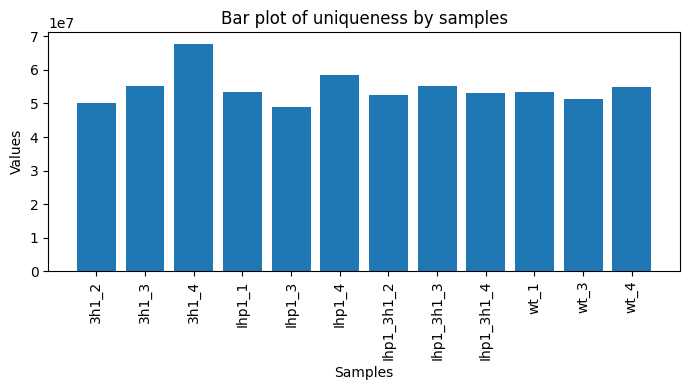

In [26]:
plt.figure(figsize=(7, 4))  # Set the figure size for better readability
plt.bar(long_samples, long_values)

# Add labels and title
plt.xlabel('Samples')
plt.ylabel('Values')
plt.title('Bar plot of uniqueness by samples')

# Rotate x-axis labels if necessary
plt.xticks(rotation=90)

# Show the plot
plt.tight_layout()  # Adjusts the plot to ensure everything fits without overlapping
plt.show()

## short reads - sample distribution

In [6]:
names_s = []
reads_mapped_s = []
reads_mapped_paired_s = []
reads_unmapped_s = []
reads_paired_s = []
bases_mapped_s = []
mismatches_s = []
error_rate_s = []
average_length_s = []
number_of_sequences = []

for file in glob.glob(f"{DIR}\\short\\*"):
    name = Path(file).stem
    names_s.append(name)
    print(name)
    df = polars.read_csv(file, has_header = True, separator = "\t", skip_rows = 7, 
                           truncate_ragged_lines=True, n_rows = 40, 
                           new_columns = ["SN", "Q", "V", "comment"]
                          )
    n_sequences = df.filter(df["Q"] == "sequences:").select("V").item()
    number_of_sequences.append(n_sequences)
    r_mapped = df.filter(df["Q"] == "reads mapped:").select("V").item()
    reads_mapped_s.append(r_mapped)
    r_mapped_paired = df.filter(df["Q"] == "reads mapped and paired:").select("V").item()
    reads_mapped_paired_s.append(r_mapped_paired)
    r_unmapped = df.filter(df["Q"] == "reads unmapped:").select("V").item()
    reads_unmapped_s.append(r_unmapped)
    r_paired = df.filter(df["Q"] == "reads paired:").select("V").item()
    reads_paired_s.append(r_paired)
    b_mapped = df.filter(df["Q"] == "bases mapped (cigar):").select("V").item()
    bases_mapped_s.append(b_mapped)
    mm = df.filter(df["Q"] == "mismatches:").select("V").item()
    mismatches_s.append(mm)
    er = df.filter(df["Q"] == "error rate:").select("V").item()
    error_rate_s.append(er)
    al = df.filter(df["Q"] == "average length:").select("V").item()
    average_length_s.append(al)
    

3h1_2_stats_result_s
3h1_3_stats_result_s
3h1_4_stats_result_s
Ihp1_1_stats_result_s
Ihp1_3h1_2_stats_result_s
Ihp1_3h1_3_stats_result_s
Ihp1_3h1_4_stats_result_s
Ihp1_3_stats_result_s
Ihp1_4_stats_result_s
wt_1_stats_result_s
wt_3_stats_result_s
wt_4_stats_result_s


In [11]:
error_rate_s

[0.002529966,
 0.002523602,
 0.002619373,
 0.002521141,
 0.00250371,
 0.002822326,
 0.002618696,
 0.002457529,
 0.002443467,
 0.002231363,
 0.002296285,
 0.002191652]

In [10]:
suma_seq_short = np.sum(number_of_sequences)

In [11]:
suma_seq_short

np.float64(788005858.0)

In [12]:
suma_seq

np.float64(728697910.0)

In [22]:
reads_mapped_mean_s = np.mean(reads_mapped_s)
reads_mapped_paired_mean_s = np.mean(reads_mapped_paired_s)
reads_unmapped_mean_s = np.mean(reads_unmapped_s)
reads_paired_mean_s = np.mean(reads_paired_s)
bases_mapped_mean_s = np.mean(bases_mapped_s)
mismatches_mean_s = np.mean(mismatches_s)
error_rate_mean_s = np.mean(error_rate_s)

In [26]:
reads_mapped_mean

np.float64(60113338.333333336)

In [27]:
reads_mapped_mean_s

np.float64(65170176.0)

In [18]:
data_s = polars.DataFrame({"samples": names_s,
                        "reads_mapped": reads_mapped_s,
                        "reads_mapped_paired": reads_mapped_paired_s,
                        "reads_unmapped": reads_unmapped_s,
                        "reads_paired": reads_paired_s,
                        "bases_mapped": bases_mapped_s,
                        "mismatches": mismatches_s,
                        "error_rate": error_rate_s,
                        "average_length": average_length_s
                        })

In [19]:
df_s = data_s.to_pandas()

In [20]:
columns_to_plot = ["reads_mapped", "reads_mapped_paired", "reads_unmapped",
                   "reads_paired", "bases_mapped", "mismatches", "error_rate", "average_length"]

for col in columns_to_plot:
    fig = px.bar(df_s, x="samples", y=col, title=f'{col}', hover_name="samples")
    fig.update_layout(
        width=600,  # Set width of the plot
        height=300,  # Set height of the plot
        margin=dict(l=20, r=20, t=30, b=20),  # Reduce margins
        title=dict(x=0.5, font=dict(size=14)),  # Center title and reduce its font size
        xaxis=dict(tickangle=45, tickfont=dict(size=10)),  # Rotate x-axis labels for readability, reduce font size
        yaxis=dict(title=None, tickfont=dict(size=10)),  # Remove y-axis title, reduce font size
        legend=dict(font=dict(size=10), orientation='h', yanchor="bottom", y=1.02, xanchor="right", x=1)  # Adjust legend position and font size
    )
    # Save the plot as a PNG image
    # img_file = f"{col}_plot.png"
    # fig.write_image(img_file)

    # Add the image to the PDF
    # c.drawImage(img_file, 50, 400, width=500, height=250)
    # c.showPage()  # Create a new page for the next plot
    # fig.write_image(f"{DIR}\\long\\{col}.png")
    fig.show()
# c.save()

In [15]:
DIR = "C:\\Users\\aurin\\Desktop\\magisterka\\mapping\\v2"
file = f'{DIR}\\unique_short.txt'
short_values = []
short_samples = []

with open(file) as f:
    for line in f:
        lista = line.split(' ')
        short_values.append(int(lista[0]))
        short_samples.append(lista[1].split('\n')[0])

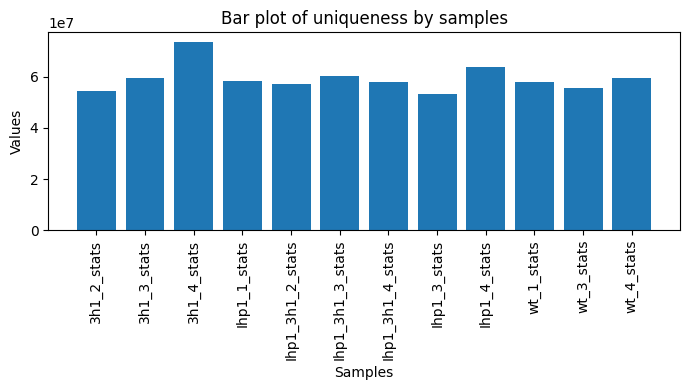

In [28]:
plt.figure(figsize=(7, 4))  # Set the figure size for better readability
plt.bar(short_samples, short_values)

# Add labels and title
plt.xlabel('Samples')
plt.ylabel('Values')
plt.title('Bar plot of uniqueness by samples')

# Rotate x-axis labels if necessary
plt.xticks(rotation=90)

# Show the plot
plt.tight_layout()  # Adjusts the plot to ensure everything fits without overlapping
plt.show()

C:\Users\aurin\AppData\Local\Temp\ipykernel_17320\1154131419.py:5: MatplotlibDeprecationWarning:

The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.



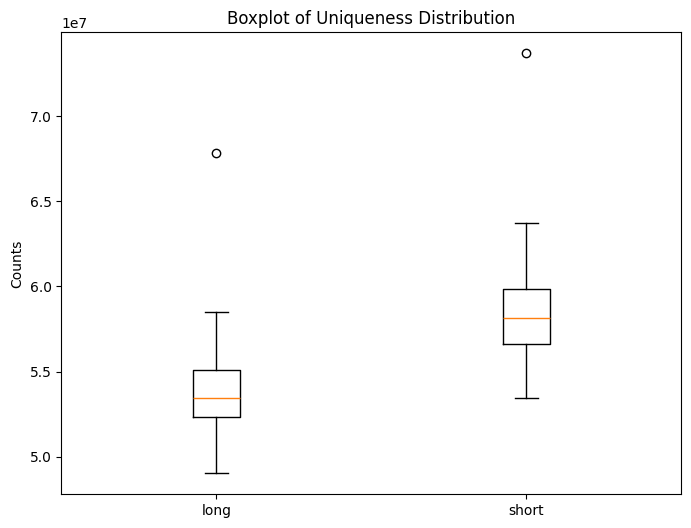

In [16]:
# Create a boxplot for both distributions
plt.figure(figsize=(8, 6))

# Create the boxplot, passing the two lists as a list of lists
plt.boxplot([long_values, short_values], labels=["long", "short"])

# Add title and labels
plt.title("Boxplot of Uniqueness Distribution")
plt.ylabel("Counts")

# Show the plot
plt.show()